In [35]:
import pandas as pd
import numpy as np
from sklearn.impute import MissingIndicator
import matplotlib.pyplot as plt

df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [36]:
# Clean data frame
df = df.drop(columns=["island", "culmen_length_mm", "culmen_depth_mm", "sex"]).dropna() 
df

,species,flipper_length_mm,body_mass_g
0,Adelie,181.0,3750.0
1,Adelie,186.0,3800.0
2,Adelie,195.0,3250.0
4,Adelie,193.0,3450.0
5,Adelie,190.0,3650.0
...,...,...,...
338,Gentoo,214.0,4925.0
340,Gentoo,215.0,4850.0
341,Gentoo,222.0,5750.0
342,Gentoo,212.0,5200.0


In [53]:
adelie_full  = df[df.species == 'Adelie']
gentoo_full  = df[df.species == 'Gentoo']
сhinstrap_full = df[df.species == 'Chinstrap']   

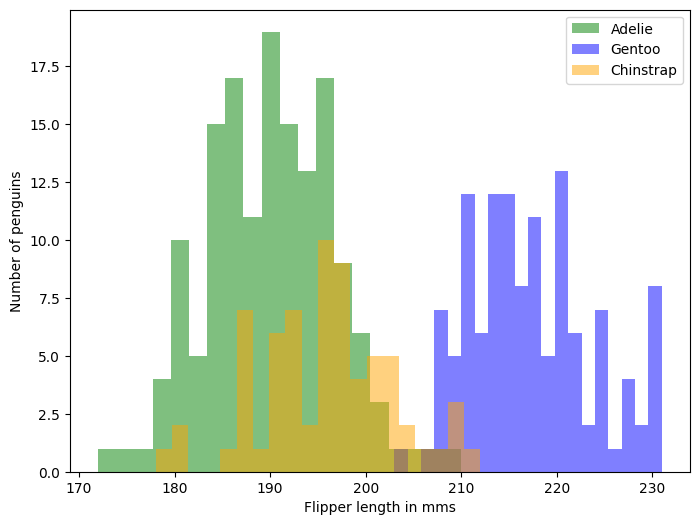

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(adelie_full.flipper_length_mm, bins=20, color='green', alpha=0.5, label='Adelie')
ax.hist(gentoo_full.flipper_length_mm, bins=20, color='blue', alpha=0.5, label='Gentoo')
ax.hist(сhinstrap_full.flipper_length_mm, bins=20, color='orange', alpha=0.5, label='Chinstrap')
ax.set_xlabel('Flipper length in mms')
ax.set_ylabel('Number of penguins')
ax.legend()
plt.show()

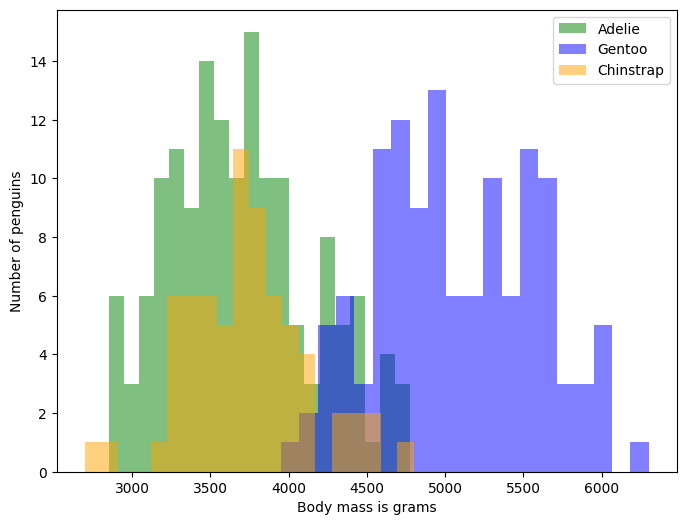

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(adelie_full.body_mass_g, bins=20, color='green', alpha=0.5, label='Adelie')
ax.hist(gentoo_full.body_mass_g, bins=20, color='blue', alpha=0.5, label='Gentoo')
ax.hist(сhinstrap_full.body_mass_g, bins=20, color='orange', alpha=0.5, label='Chinstrap')
ax.set_xlabel('Body mass is grams')
ax.set_ylabel('Number of penguins')
ax.legend()
plt.show()

Text(0, 0.5, 'Body mass in grams')

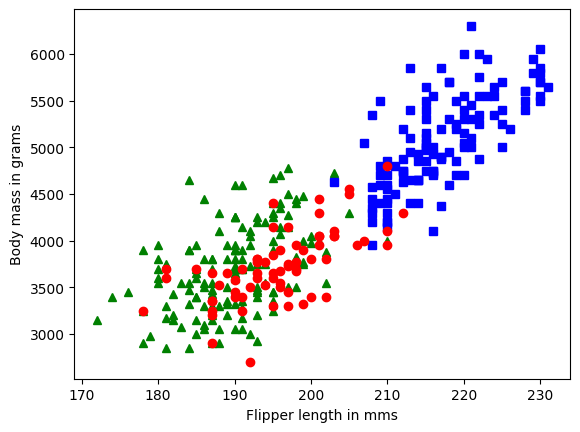

In [56]:
plt.plot(adelie_full.flipper_length_mm, adelie_full.body_mass_g, 'g^',\
         gentoo_full.flipper_length_mm, gentoo_full.body_mass_g, 'bs',\
         сhinstrap_full.flipper_length_mm, сhinstrap_full.body_mass_g,'ro')

plt.xlabel('Flipper length in mms')
plt.ylabel('Body mass in grams')

Aligned dataframe: 68 68


Text(0, 0.5, 'Body mass in grams')

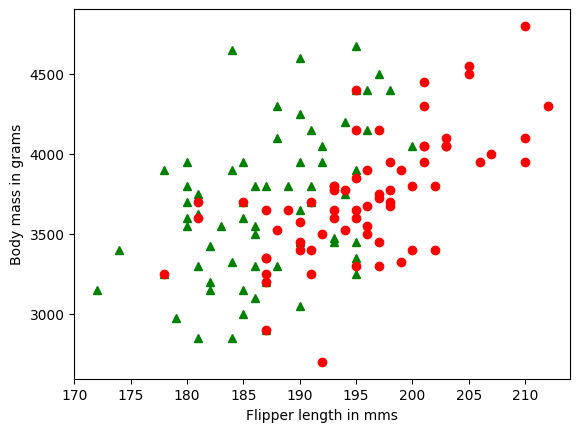

In [57]:
adelies = adelie_full.shape[0]
сhinstraps = сhinstrap_full.shape[0]

if adelies > сhinstraps:
    adelie_full = adelie_full.drop(adelie_full.tail(adelies - сhinstraps).index)
elif сhinstraps > adelies:
    сhinstrap_full = сhinstrap_full.drop(сhinstrap_full.tail(сhinstraps - adelies).index)
    
print('Aligned dataframe:',  adelie_full.shape[0], сhinstrap_full.shape[0])

plt.plot(adelie_full.flipper_length_mm, adelie_full.body_mass_g, 'g^',\
         сhinstrap_full.flipper_length_mm, сhinstrap_full.body_mass_g,'ro')

plt.xlabel('Flipper length in mms')
plt.ylabel('Body mass in grams')

In [72]:
# Prepare train and test data 
from sklearn.model_selection import train_test_split

features = np.concatenate((adelie_full.drop(columns=['species']).to_numpy(),\
                           сhinstrap_full.drop(columns=['species']).to_numpy()), axis=0)
print(len(features))

species = np.concatenate(([0] * adelie_full.shape[0],
                          [1] * сhinstrap_full.shape[0]), axis=0)
print(len(species))

features_train, features_test, species_train, species_test = train_test_split(features, species, test_size=0.3, random_state=60)

136
136


Accuracy: 0.83
[[0.1463332  0.8536668 ]
 [0.5423232  0.4576768 ]
 [0.11747836 0.88252164]
 [0.66087245 0.33912755]
 [0.37670265 0.62329735]
 [0.21407827 0.78592173]
 [0.62909419 0.37090581]
 [0.75809454 0.24190546]
 [0.32420879 0.67579121]
 [0.54551651 0.45448349]
 [0.89393578 0.10606422]
 [0.71258794 0.28741206]
 [0.00514501 0.99485499]
 [0.22623057 0.77376943]
 [0.63472736 0.36527264]
 [0.40911568 0.59088432]
 [0.60900919 0.39099081]
 [0.05681117 0.94318883]
 [0.80478208 0.19521792]
 [0.05306057 0.94693943]
 [0.35313364 0.64686636]
 [0.00361966 0.99638034]
 [0.47147145 0.52852855]
 [0.770044   0.229956  ]
 [0.15505014 0.84494986]
 [0.09133159 0.90866841]
 [0.50455018 0.49544982]
 [0.69914004 0.30085996]
 [0.51343659 0.48656341]
 [0.73824114 0.26175886]
 [0.48102329 0.51897671]
 [0.26674638 0.73325362]
 [0.30208545 0.69791455]
 [0.63664496 0.36335504]
 [0.73603866 0.26396134]
 [0.20236474 0.79763526]
 [0.30066136 0.69933864]
 [0.0807067  0.9192933 ]
 [0.34140583 0.65859417]
 [0.085903

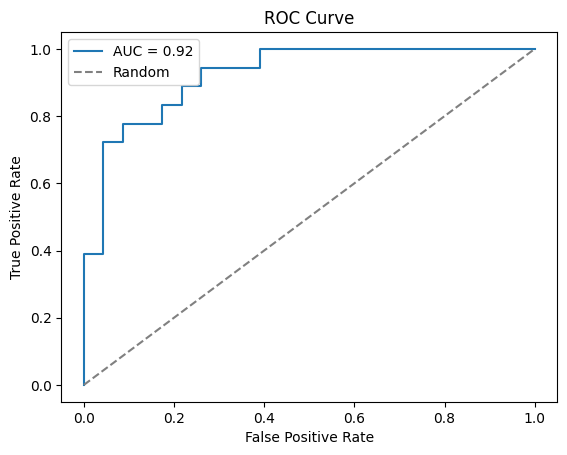

In [73]:
# Out-of-box classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

gnb = GaussianNB()
gnb.fit(features_train, species_train)

species_pred = gnb.predict(features_test)
accuracy = accuracy_score(species_test, species_pred)
print(f"Accuracy: {accuracy:.2f}")

species_proba  = gnb.predict_proba(features_test)
print(species_proba)

fpr, tpr, thresholds = roc_curve(species_test, species_proba[:, 1])
auc_score = roc_auc_score(species_test, species_proba[:, 1])

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Accuracy: 0.83
[[0.14633219 0.85366781]
 [0.54232338 0.45767662]
 [0.11747715 0.88252285]
 [0.66087331 0.33912669]
 [0.37670236 0.62329764]
 [0.21407598 0.78592402]
 [0.62909508 0.37090492]
 [0.75809433 0.24190567]
 [0.324208   0.675792  ]
 [0.54551669 0.45448331]
 [0.89393605 0.10606395]
 [0.71258861 0.28741139]
 [0.00514482 0.99485518]
 [0.22622969 0.77377031]
 [0.63472825 0.36527175]
 [0.40911563 0.59088437]
 [0.60901005 0.39098995]
 [0.05681021 0.94318979]
 [0.80478243 0.19521757]
 [0.05305875 0.94694125]
 [0.35313281 0.64686719]
 [0.00361951 0.99638049]
 [0.47147183 0.52852817]
 [0.77004463 0.22995537]
 [0.15504885 0.84495115]
 [0.09133046 0.90866954]
 [0.50455056 0.49544944]
 [0.6991408  0.3008592 ]
 [0.51343714 0.48656286]
 [0.73824157 0.26175843]
 [0.48102346 0.51897654]
 [0.26674567 0.73325433]
 [0.30208495 0.69791505]
 [0.63664531 0.36335469]
 [0.7360393  0.2639607 ]
 [0.20236369 0.79763631]
 [0.30066085 0.69933915]
 [0.08070569 0.91929431]
 [0.34140401 0.65859599]
 [0.085901

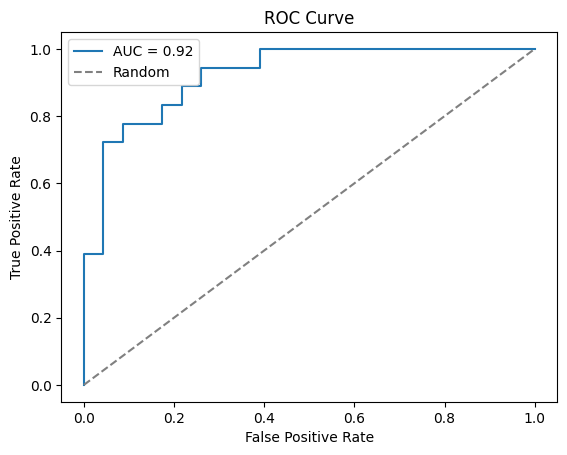

In [74]:
# In-house classifier
class InHouseGNB:
    def _separate_by_classes(self, x, y):
        classes_index = {}
        x_separated = {}
        cls, counts = np.unique(y, return_counts=True)
        self.sum = sum(counts) 
        self.class_freq = dict(zip(cls, counts))
        for class_type in self.class_freq:
            classes_index[class_type] = np.argwhere(y==class_type)
            x_separated[class_type] = x[classes_index[class_type], :]
        return x_separated
    
    def _likelyhood_log(x, mean, stdev):
        return (-0.5*((x - mean)/ stdev)**2) - np.log(np.sqrt(2*np.pi)*stdev)
    
    def _predict_proba_for_one(self, x):
        class_prob = dict()
        for cls in self.class_freq:
            class_prob[cls] = np.log(self.class_freq[cls] / float(self.sum))
            for i in range(self.x_features):
                class_prob[cls] += InHouseGNB._likelyhood_log(x[i], self.means[cls][i], self.std[cls][i])              
         
        class_prob = {cls: np.e ** class_prob[cls] for cls in class_prob}
        class_prob_sum = sum(class_prob.values())
        class_prob = {cls: class_prob[cls]/class_prob_sum for cls in class_prob}
        
        return class_prob
    
    def predict_proba(self, x):
        res = np.zeros((0, len(self.class_freq)))
        for x_i in x:
            prob_for_single = self._predict_proba_for_one(x_i)
            prob_for_single = [prob_for_single[i] for i in prob_for_single]   
            res = np.vstack((res, prob_for_single))
        print(res)    
        return res              
    
    def predict(self, X):
        pred = []
        for x in X:
            pred_class = None
            max_prob = 0.0
            for cls, prob in self._predict_proba_for_one(x).items():
                if prob > max_prob:
                    max_prob = prob
                    pred_class = cls
            pred.append(pred_class)
        return pred

    
    def fit(self, x, y):
        assert(len(x) == len(y))
        separated_X = self._separate_by_classes(x, y)
        self.x_features = x.shape[1]
        self.means = {}
        self.std = {}
        for class_type in self.class_freq:
            self.means[class_type] = np.mean(separated_X[class_type], axis=0)[0]
            self.std[class_type] = np.std(separated_X[class_type], axis=0)[0]
        return self
    

ihgnb = InHouseGNB()

ihgnb.fit(features_train, species_train)

species_pred = ihgnb.predict(features_test)
accuracy = accuracy_score(species_test, species_pred)
print(f"Accuracy: {accuracy:.2f}")

species_proba  = ihgnb.predict_proba(features_test)

fpr, tpr, thresholds = roc_curve(species_test, species_proba[:, 1])
auc_score = roc_auc_score(species_test, species_proba[:, 1])

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
